# Logistic Regression for Binary Classification

In [47]:

#Importing essential libraries 
from sklearn import datasets  #we are going to use the dataset already present it sklearn.datasets
import matplotlib.pyplot as plt  #used to plot graphs
import seaborn as sns
%matplotlib inline
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8}) #setting style for the plot

import pandas as pd
import numpy as np
import math


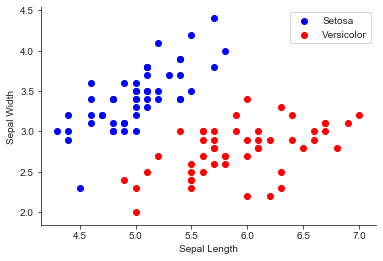

In [48]:
#loading The iris dataset 
data = datasets.load_iris()

#we are going to take only two classes setosa and versicolor
#and we only going to take only two features i.e sepallength and sepalwidth for our convenience
X = data.data[:100, :2] #first 100 entries with only  sepallength and sepalwidth columns
y = data.target[:100] #the target here is the species column , which define setosa and versicolor
X_full = data.data[:100, :] #this is the full data that we are using in our algorithm

setosa = plt.scatter(X[:50,0], X[:50,1], c='b') #ploting setosa that is the first 50 rows in the dataset
versicolor = plt.scatter(X[50:,0], X[50:,1], c='r') #ploting versicolor that is the second 50 rows in the dataset 
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend((setosa, versicolor), ("Setosa", "Versicolor"))
sns.despine() #to remove top and right boundary line of the plot

# Logisitic Function
So we want to return a value between 0 and 1 to make sure we are actually representing a probability. To do this we will make use of the logistic function. The logistic function mathematically looks like this:
# y=1/1+e^(-x) 

This function is also called as sigmoid function.

Let's take a look at the plot:

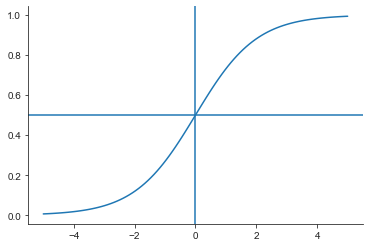

In [49]:
#To plot the sigmoid function
x_values = np.linspace(-5, 5, 100)
y_values = [1 / (1 + math.e**(-x)) for x in x_values]
plt.plot(x_values, y_values)
plt.axhline(.5)
plt.axvline(0)
sns.despine()

# Hypothesis
<img src="Hypothesis.png">

In [50]:
# This is the sigmoid function or the logistic function.
# This makes sure that the output of the hypothesis we use to be within 0 and 1
def logistic_func(b, x):
    #here x is of 100*2 matrix and b is 1*2
    return float(1) / (1 + math.e**(-x.dot(b)))  
    # hypothesis = yi = f(x) this is of the form b.T *x which will return 100*1 i.e 100 values


# Cost Function
<img src="CostFunction.png">

In [62]:
#This is the cost function ,
# which should decrease in order to find perfect parameters i.e b values , in order to form a near perfect decision boundary
# The cost function is: -y*log(f(x))-(1-y)*log(1-f(x))
def cost_func(b, x, y):
    log_func_v = logistic_func(b,x)
    step1 = y * np.log(log_func_v)   # yi*log (f(xi))
    step2 = (1-y) * np.log(1 - log_func_v) #(1-yi)*log(1-f(xi))
    final = -step1 - step2
    return np.mean(final)


# Gradient Descent
<img src="Costgd.png">

In [52]:
#This function is used to calculate a part of gradient equation
#it would be better if we split gradient descent part into 2 steps
def log_gradient(b, x, y):
    first_calc = logistic_func(b, x) - y   # [yi - f(xi)]
    final_calc = first_calc.T.dot(x)   # part of the cost function [yi - f(xi)]Xi
    return final_calc


In [53]:
#here I have implemented gradient descent to minimize the cost function  
def grad_desc(b_values, X, y, lr=.001, converge_change=.001):
    #setup cost iter array, to keep track of the cost 
    cost_iter = []
    cost = cost_func(b_values, X, y) # we will get the initial cost with the intial parameters values i.e b values
    cost_iter.append([0, cost]) #we append the first cost
    change_cost = converge_change + 1 #inital change in the cost to be taken as 1.001
    i = 1
    while(change_cost > converge_change): #as long as the change in the cost is greater than 0.001 we will keep on 
        #running the iterations to produce new cost with new parameters till the change is the cost is minimal
        old_cost = cost
        b_values = b_values - (lr * log_gradient(b_values, X, y))   # bi= bi - [- lr([yi - f(xi)]Xi)] Parameters values changes
        cost = cost_func(b_values, X, y)
        cost_iter.append([i, cost])
        change_cost = old_cost - cost
        i+=1
    return b_values, np.array(cost_iter)

In [54]:
def pred_values(b, X, hard=True):
    #This is to predict the values with the to classify into two classes  
    pred_prob = logistic_func(b, X)
    pred_value = np.where(pred_prob >= .5, 1, 0) 
    #np.where can be used to generate a array of result based on values in pred_prob array
    if hard:
        return pred_value
    return pred_prob

In [55]:
shape = X.shape[1] #X has 100*2 so shape[1] will be 2
y_flip = np.logical_not(y) #flip Setosa to be 1 and Versicolor to zero to be consistent
betas = np.zeros(shape) #initial parameters value to be taken as zero array with 2 zeros
fitted_values, cost_iter = grad_desc(betas, X, y_flip)
print(fitted_values)

[-1.19504298  2.08716169]


In [56]:
print(cost_iter)  

[[  0.           0.69314718]
 [  1.           0.68580273]
 [  2.           0.67931111]
 [  3.           0.67292412]
 [  4.           0.66664001]
 [  5.           0.66045708]
 [  6.           0.65437362]
 [  7.           0.64838794]
 [  8.           0.64249837]
 [  9.           0.63670325]
 [ 10.           0.63100093]
 [ 11.           0.62538981]
 [ 12.           0.61986826]
 [ 13.           0.6144347 ]
 [ 14.           0.60908757]
 [ 15.           0.60382531]
 [ 16.           0.59864641]
 [ 17.           0.59354934]
 [ 18.           0.58853263]
 [ 19.           0.58359481]
 [ 20.           0.57873443]
 [ 21.           0.57395007]
 [ 22.           0.56924034]
 [ 23.           0.56460385]
 [ 24.           0.56003924]
 [ 25.           0.55554519]
 [ 26.           0.55112038]
 [ 27.           0.54676351]
 [ 28.           0.54247333]
 [ 29.           0.53824858]
 [ 30.           0.53408804]
 [ 31.           0.52999051]
 [ 32.           0.5259548 ]
 [ 33.           0.52197976]
 [ 34.        

we can see how cost has decresed over the iterations with different parameters.
we can also observe that the last two entries in this array i.e the 151 and 152 entries,
the change in the cost is almost equal to 0.001, This will stop the gradient descent 
and the parameter values used in the 152 iteration's cost function is used as the optimal parameters to generate the decision boundary

In [57]:
#We can see the predicted values here
predicted_y = pred_values(fitted_values, X,hard = True)
predicted_y
#In the 1st 50 values one of the value is incorrectly predicted 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# The decision boundary of the algorithm
<img src="Logistic fit.png">

In [59]:
#since one of it is incorrectly predicted , so the below line gives 99 i.e 99 values are correct
np.sum(y_flip == predicted_y)

99

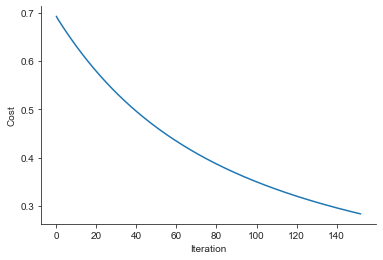

In [60]:
#The cost over iteration is plotted below
plt.plot(cost_iter[:,0], cost_iter[:,1])
plt.ylabel("Cost")
plt.xlabel("Iteration")
sns.despine()

In [61]:
#Comparing the model i have built with the sklearn's model
from sklearn import linear_model
logreg = linear_model.LogisticRegression()
logreg.fit(X, y_flip)
sum(y_flip == logreg.predict(X)) #Checking whether output of our model is equal to sklearn model's output 
#The sum total of correct predictions is 100 
#so we can infer that our model is working just like sklearn's model

100